<a href="https://colab.research.google.com/github/pseudo-sm/cv-dl-basic/blob/master/BasicGAN_ipynbGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import torch
from torch.nn import Module
from torch import nn

In [13]:
from numpy import random
import pandas as pd

In [ ]:
if torch.cuda.is_available():
  torch.set_default_tensor_type(torch.cuda.FloatTensor)
  print('using cuda : ',torch.cuda.get_device_name(0))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

using cuda :  Tesla T4


In [ ]:
device

device(type='cuda')

In [8]:
def generate_real():

  tensor = torch.FloatTensor([random.uniform(0.2,0.8),random.uniform(0.0,0.2),random.uniform(0.2,0.8),random.uniform(0.0,0.2)])
  return tensor

In [9]:
def generate_random():
  tensor = torch.rand(4)
  return tensor

In [53]:
class Descriminator(nn.Module):
  
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(4,3),nn.Sigmoid(),nn.Linear(3,1),nn.Sigmoid()
        )
    self.loss_function = nn.MSELoss()
    self.optimiser = torch.optim.SGD(self.parameters(),lr=0.02)
    self.counter = 0
    self.progress = []
  
  def forward(self,inputs):
    return self.model(inputs)
  
  def train(self,inputs,targets):
    outputs = self.forward(inputs)
    loss = self.loss_function(outputs,targets)
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()
    self.counter+=1
    if(self.counter%10==0):
      self.progress.append(loss.item())
    if(self.counter%1000==0):
      print("Counter : {}".format(self.counter))
  
  def plot_progress(self):
    df = pd.DataFrame(self.progress,columns = ['Loss'])
    df.plot(ylim=(0,1.0),figsize=(16,8),alpha=0.1,marker='.',grid=True,yticks=(0,0.25,0.5))


In [51]:
d = Descriminator()

In [52]:
for i in range(10000):
  d.train(generate_real(),torch.FloatTensor([1.0]))
  d.train(generate_random(),torch.FloatTensor([0.0]))

Counter : 1000
Counter : 2000
Counter : 3000
Counter : 4000
Counter : 5000
Counter : 6000
Counter : 7000
Counter : 8000
Counter : 9000
Counter : 10000
Counter : 11000
Counter : 12000
Counter : 13000


KeyboardInterrupt: ignored

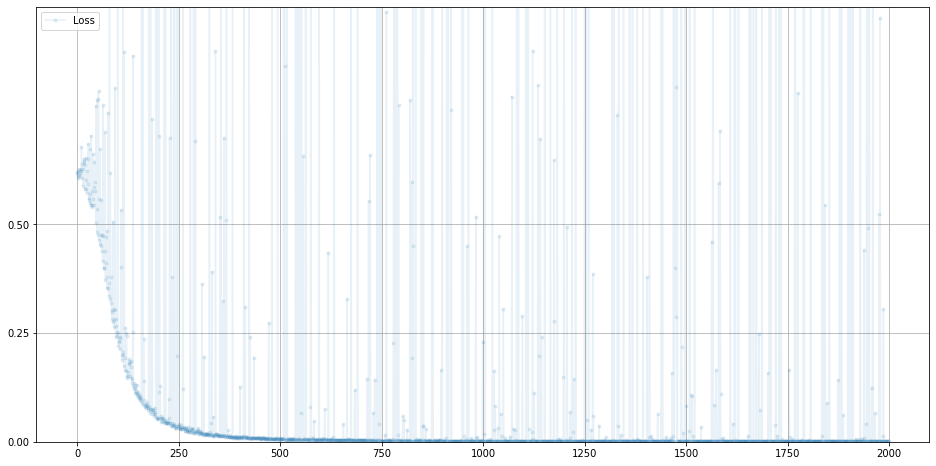

In [26]:
d.plot_progress()

In [28]:
print(d.forward(generate_real()))

tensor([0.9616], grad_fn=<SigmoidBackward0>)


In [29]:
print(d.forward(generate_random()))

tensor([0.0041], grad_fn=<SigmoidBackward0>)


In [54]:
class Generator(nn.Module):
  
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(1,3),nn.Sigmoid(),nn.Linear(3,4),nn.Sigmoid()
        )
    self.loss_function = nn.MSELoss()
    self.optimiser = torch.optim.SGD(self.parameters(),lr=0.01)
    self.counter = 0
    self.progress = []
  
  def forward(self,inputs):
    return self.model(inputs)
  
  def train(self,D,inputs,targets):
    g_output = self.forward(inputs)
    d_output = D.forward(g_output)
    loss = D.loss_function(d_output,targets)
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()
    self.counter+=1
    if(self.counter%10==0):
      self.progress.append(loss.item())
    if(self.counter%1000==0):
      print("Counter : {}".format(self.counter))
  
  def plot_progress(self):
    df = pd.DataFrame(self.progress,columns = ['Loss'])
    df.plot(ylim=(0,1.0),figsize=(16,8),alpha=0.1,marker='.',grid=True,yticks=(0,0.25,0.5))


In [55]:
g = Generator()

In [56]:
g.forward(torch.FloatTensor([0.5]))

tensor([0.5344, 0.3613, 0.3261, 0.3747], grad_fn=<SigmoidBackward0>)

In [57]:
D = Descriminator()
G = Generator()

In [63]:
%%timeit
for i in range(10000):
  D.train(generate_real(),torch.FloatTensor([1.0]))
  D.train(G.forward(torch.FloatTensor([0.5])).detach(),torch.FloatTensor([0.0]))
  G.train(D,torch.FloatTensor([0.5]),torch.FloatTensor([1.0]))

Counter : 21000
Counter : 22000
Counter : 11000
Counter : 23000
Counter : 24000
Counter : 12000
Counter : 25000
Counter : 26000
Counter : 13000
Counter : 27000
Counter : 28000
Counter : 14000
Counter : 29000
Counter : 30000
Counter : 15000
Counter : 31000
Counter : 32000
Counter : 16000
Counter : 33000
Counter : 34000
Counter : 17000
Counter : 35000
Counter : 36000
Counter : 18000
Counter : 37000
Counter : 38000
Counter : 19000
Counter : 39000
Counter : 40000
Counter : 20000
Counter : 41000
Counter : 42000
Counter : 21000
Counter : 43000
Counter : 44000
Counter : 22000
Counter : 45000
Counter : 46000
Counter : 23000
Counter : 47000
Counter : 48000
Counter : 24000
Counter : 49000
Counter : 50000
Counter : 25000
Counter : 51000
Counter : 52000
Counter : 26000
Counter : 53000
Counter : 54000
Counter : 27000
Counter : 55000
Counter : 56000
Counter : 28000
Counter : 57000
Counter : 58000
Counter : 29000
Counter : 59000
Counter : 60000
Counter : 30000
Counter : 61000
Counter : 62000
Counter 

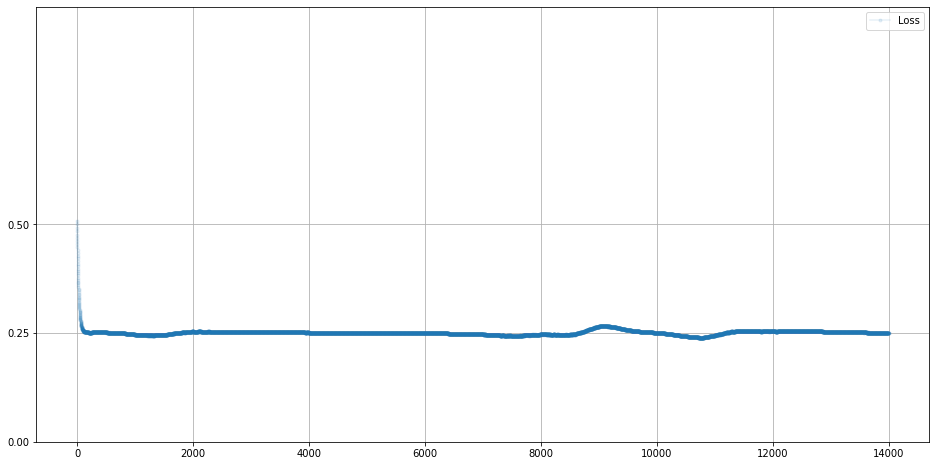

In [64]:
D.plot_progress()

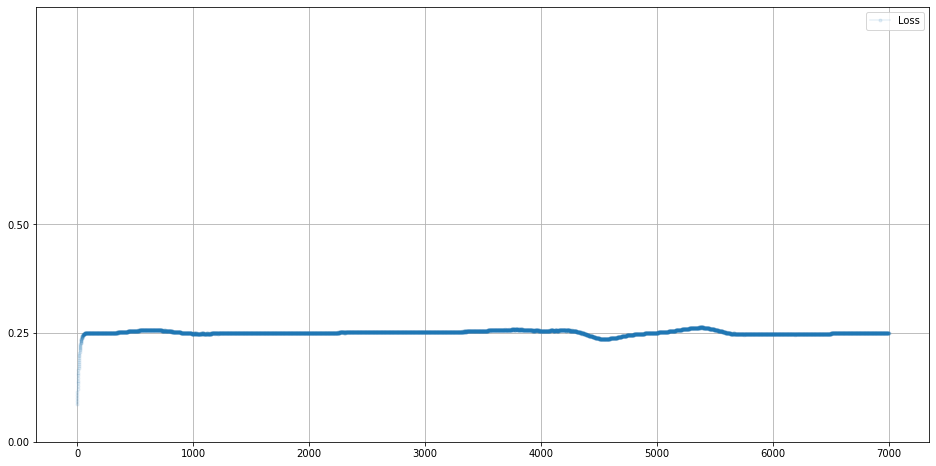

In [65]:
G.plot_progress()

In [68]:
G.forward(torch.FloatTensor([0.5]))

tensor([0.4348, 0.0334, 0.5941, 0.0350], grad_fn=<SigmoidBackward0>)